# Composite Beam 
## (Fundamentals of Steel Structures 2022)

Task: Determine the bending moment resistance of steel-concrete composite section for sagging bending moment.

In [158]:
# Input data 
SPAN = 12000       #[mm], beam span
DepthSlab = 130    #[mm], overall slab depth (metal deck + topping)
beamSpacing = 3000 #[mm], spacing between two adjacent beams

In [159]:
import math
fail = False

In [160]:
# Decking profile
# ComFlor 80
trghSpacing = 300  #[mm], trough spacing (shear connectors spacing)
DepthDeck = 80 #[mm], depth of decking
b0 = 135 #[mm]

In [161]:
nsc = int(SPAN / 2 / trghSpacing)   # number of shear connectors in 
                                    # half of a beam span (up to the 
                                    # position of maximum bending 
                                    # moment), assuming integer part
nscr = 1                            # number of shear connectors per 
                                    # trough

In [162]:
print("nsc                       = ", ("%2.0f" % nsc), " [-]")

nsc                       =  20  [-]


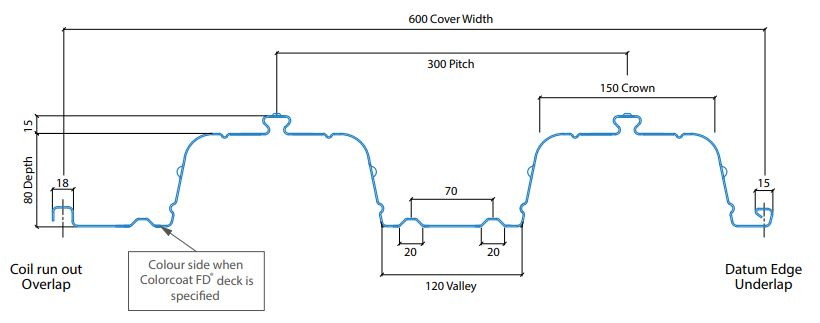

In [163]:
# Beam profile
#IPE 300
A = 5381 #[mm], cross-sectional area
Iy = 83560000  #[mm^4]
Wy = 557000  #[mm^3]
Iz = 6038000  #[mm^4]

In [164]:
# Shear connectors
hsc = 110   #[mm], height of shear connector
dsc = 19    #[mm], diametre

In [165]:
# Material
# Steel
E = 210000 #[MPa]
G = 80700  #[MPa]
fy = 275   #[MPa]
gammaM1 = 1
gammaM0 = 1
gammaV = 1.25
# Concrete
fck = 35  #[MPa]
Ecm = 31000 #[MPa]
# Shear connector
fusc = 500 #[MPa]

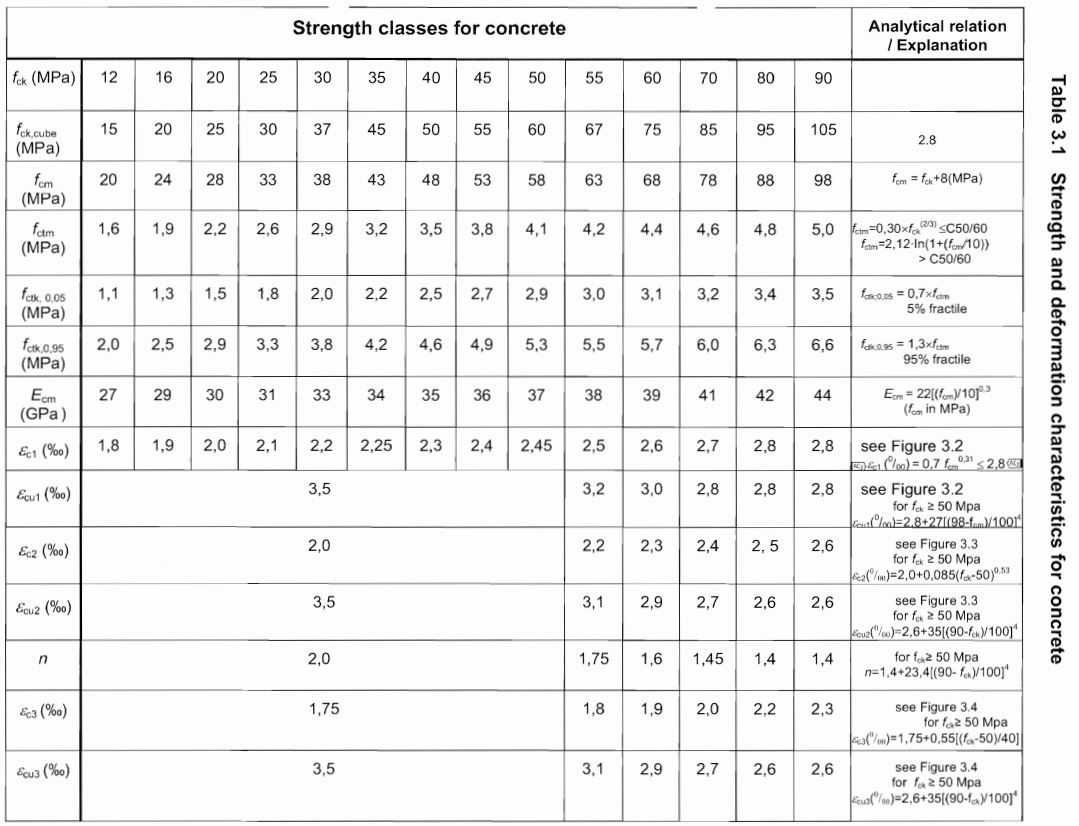

## Moment capacity of steel profile

In [166]:
MplaRd = fy * Wy / gammaM0 / 1000000

In [167]:
print("MplaRd                    = ", ("%2.2f" % (MplaRd)), " [kNm]")

MplaRd                    =  153.18  [kNm]


In [168]:
### Position of neutral axis in case of full shear connection

In [169]:
beff = min(SPAN/4, beamSpacing)
x = fy * A / gammaM0 / 0.85 / fck / beff

In [170]:
print("beff                      = ", ("%2.2f" % beff), " [mm]")
print("x                         = ", ("%2.2f" % x), " [mm]")

beff                      =  3000.00  [mm]
x                         =  16.58  [mm]


In [171]:
hc = DepthSlab - DepthDeck

In [172]:
# check depth of concrete topping
if x > DepthSlab - DepthDeck:
    fail = True

In [173]:
print("fail                      = ", (fail), " ")

fail                      =  False  


In [174]:
if x <= DepthSlab - DepthDeck:
    print("PNA in slab, topping is ADEQUATE")
else:
    print("TOPPING INADEQUATE!!!.")

PNA in slab, topping is ADEQUATE


## Moment capacity assuming full shear connection

In [175]:
gamma_c = 1.5
fcd = fck * gamma_c
Npla = fy * A / gammaM0
Ncf = 0.85 * fcd * beff * x
ht = DepthSlab + h
# lever arm
z = (h / 2) + (ht - Npla * hc / 2 / Ncf)
# Moment at full shear connection
MplRd = Npla * (h / 2 + ht - Npla * hc / 2 / Ncf ) / 1000000

In [176]:
print("Npla                      = ", ("%2.2f" % (Npla / 1000)) , " [kN]")
print("Ncf                       = ", ("%2.2f" % (Ncf / 1000)), " [kN]")
print("ht                        = ", ("%2.2f" % (ht)), " [mm]")
print("z                         = ", ("%2.2f" % (z)), " [mm]")
print("MplRd                     = ", ("%2.2f" % (MplRd)), " [kNm]")

Npla                      =  1479.78  [kN]
Ncf                       =  2219.66  [kN]
ht                        =  530.00  [mm]
z                         =  713.33  [mm]
MplRd                     =  1055.57  [kNm]


## Capacity of shear connector

In [177]:
rat = hsc / dsc
if rat >= 3 and rat <= 4:
    alpha = 0.2 * (rat + 1)
else:
    alpha = 1

In [178]:
Prd1 = 0.29 * alpha * dsc**2 * math.sqrt(fck * Ecm) / gammaV
Prd2 = 0.8 * fusc * 3.14159 * dsc**2 / 4 / gammaV
Prd = min(Prd1, Prd2)

# Deck shape factor
kt = 0.7 * b0 / math.sqrt(nscr) / DepthDeck * (hsc / DepthDeck - 1)
Prd = kt * Prd

In [179]:
print("Prd1                        = ", ("%2.2f" % (Prd1 / 1000)), " [kN]")
print("Prd2                        = ", ("%2.2f" % (Prd2 / 1000)), " [kN]")
print("kt                          = ", ("%2.2f" % (kt)), " [-]")
print("Prd                         = ", ("%2.2f" % (Prd / 1000)), " [kN]")

Prd1                        =  87.24  [kN]
Prd2                        =  90.73  [kN]
kt                          =  0.44  [-]
Prd                         =  38.64  [kN]


## Force transferred by shear connectors

In [180]:
Fsc = Prd * nsc
deg = min(1, Fsc / Npla)

print("Fsc                         = ", ("%2.2f" % (Fsc / 1000)), " [kN]")
if Fsc >= Npla:
    print("Fsc >= Npla, therefore: Full shear connection")
else:
    print("Fsc < Npla, therefore: Partial shear connection")
print("Degree of shear connection  = ", ("%2.2f" % (deg)), " [-]")

Fsc                         =  772.88  [kN]
Fsc < Npla, therefore: Partial shear connection
Degree of shear connection  =  0.52  [-]


## Moment capacity at partial shear connection

In [181]:
MRd = MplaRd + (MplRd - MplaRd) * deg

In [182]:
print("MRd                        = ", ("%2.2f" % (MRd)), " [kNm]")

MRd                        =  624.49  [kNm]
